In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("titanic.csv")

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [32]:
df.Sex = df.Sex.map({"male":1, "female":0})

In [33]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [34]:
df.Embarked = df.Embarked.map({"S":0, "C":1, "Q":2})

In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


In [36]:
df.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [37]:
df.shape

(891, 8)

In [38]:
df.isna().query("Embarked == True")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,False,False,False,False,False,False,False,True
829,False,False,False,False,False,False,False,True


In [39]:
df = df.drop([61, 829])

In [40]:
df = df.interpolate()

<AxesSubplot:>

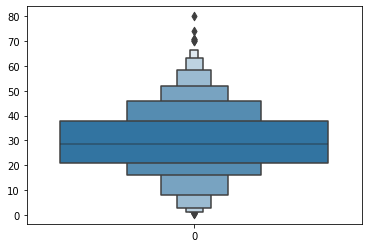

In [41]:
sns.boxenplot(df.Age)

In [42]:
df.Fare[df.Fare > 230] = df.Fare.median()

C:\Users\Sehii\AppData\Local\Temp\ipykernel_20912\3789344138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Fare[df.Fare > 230] = df.Fare.median()


In [43]:
X = df.drop(columns="Survived")
y = df.Survived

In [44]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_norm = mms.fit_transform(X)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state = 42, test_size=0.2)

In [46]:
from keras.utils.np_utils import to_categorical


y_train = to_categorical(y_train)

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
tf.random.set_seed(9)

In [48]:
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(7,)))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))

In [49]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")

In [50]:
model.fit(X_train, y_train, 
          epochs=100, 
          validation_freq=3)

Epoch 1/100


23/23 [==============================] - 1s 2ms/step - loss: 0.6682 - accuracy: 0.5837
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.6456
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.6554
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6068 - accuracy: 0.7004
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7328
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7595
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.7525
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5553 - accuracy: 0.7722
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5578 - accuracy: 0.7567
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.7637
Epoch 11/100
23/23 [=

In [57]:
y_pred = model.predict(X_test)
binary_predictions = (y_pred[:, 1] >= 0.7).astype(int)

6/6 [==============================] - 0s 2ms/step


In [58]:
binary_predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1])

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def score_function(true_labels, predicted_labels):
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels)
    print("-------------------------------")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)
    print("-------------------------------")


In [60]:
score_function(y_test, binary_predictions)

-------------------------------
Precision: 0.8245614035087719
Recall: 0.6811594202898551
F1 Score: 0.746031746031746
Accuracy: 0.8202247191011236
-------------------------------
